# Import Library

In [1]:
# import library esensial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
# buka dataset dan simpan dalam dataframe
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
# menampilkan data awal train_data
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# menampilkan informasi dari data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Preparation
Data yang didapat tidak selalu dapat langsung diproses, hal ini dapat disebabkan seperti data yang tidak lengkap, tidak konsisten, dan terdapat noise (data error atau outlier). Sehingga perlu dilakukan tahap pra pemrosesan data agar data dapat melakukan analisis serta mengetahui informasi apa saja yang dapat digunakan dalam pembuatan model 

## Data Cleaning
Data cleaning atau pembersihan data dapat dilakukan dengan mengatasi missing value atau nilai hilang (Null). Missing value dapat diatasi dengan mengisi data dengan mean, median, dan modus. Jika hanya terdapat sedikit nilai missing value, dapat dilakukan menghapus nilai tersebut

In [5]:
# cek data kosong
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Hasil pengecekan menunjukan bahwa hanya terdapat 1 data missing value di kolom 'Route' dan 'Total_Stops' sehingga dapat dilakukan penghapusan saja

In [6]:
# menghapus data kosong
train_data.dropna(inplace=True)

In [7]:
# cek data kosong kembali
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Transformation dan Data Insight
Data transformation adalah metode untuk mengkonversi data awal menjadi data yang dapat digunakan. Sebelum melakukan transformasi perlu dilakukan pengecekan tipe data terlebih dahulu untuk mengetahui tipe data apa saja yang kita terima dalam 
suatu data. Model machine learning melakukan proses berdasarkan matematika yang membutuhkan variabel independen dan dependen. variabel independen (juga disebut sebagai Fitur) adalah input untuk proses yang sedang dianalisis. Variabel dependen adalah output dari proses. Pada umumnya bentuk data diklasifikasi menjadi dua yaitu kategorik dan numerik,  sehingga data perlu dikoneversi menjadi bentuk numerik. untuk memudahkan konversi, data dapat dipisah menjadi kategorik dan numerik.

In [8]:
# cek nama kolom
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
# cek tipe data
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Numeric Data
Dari informasi diatas hanya kolom 'Price' dengan tipe integer dan kolom lainya memiliki tipe object. Kolom tanggal seperti 'Date_of_Journey','Dep_Time', dan 'Arrival_Time' pada dasarnya adalah format date-time, sehingga dapat ditransformasi menjadi date-time yang dimana tipe data tersebut dapat urai menjadi numerik.

In [10]:
# membuat variabel baru Duration untuk memudahkan
# mengubah waktu('Date_of_Journey','Dep_Time', 'Arrival_Time') ke format date time
col_num = pd.DataFrame()
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    col_num[i] = pd.to_datetime(train_data[i])

In [11]:
# cek kembali tipe data
print(col_num.dtypes)
col_num.head()

Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
dtype: object


,Date_of_Journey,Dep_Time,Arrival_Time
0,2019-03-24,2022-02-13 22:20:00,2022-03-22 01:10:00
1,2019-01-05,2022-02-13 05:50:00,2022-02-13 13:15:00
2,2019-09-06,2022-02-13 09:25:00,2022-06-10 04:25:00
3,2019-12-05,2022-02-13 18:05:00,2022-02-13 23:30:00
4,2019-01-03,2022-02-13 16:50:00,2022-02-13 21:35:00


In [12]:
# cek tahun penerbangan
col_num['Date_of_Journey'].dt.year.value_counts()

2019    10682
Name: Date_of_Journey, dtype: int64

In [13]:
# cek tahun kedatangan penerbangan
col_num['Arrival_Time'].dt.year.value_counts()

2022    10682
Name: Arrival_Time, dtype: int64


Dari tipe data datetime, informasi waktu (tahun, bulan, tanggal, dll) dapat diurai lebih mudah. Tujuan mengurai informasi waktu mejadi terpisah antara lain memudahkan model untuk membaca data.

Perubahan format datetime menybebabkan penambahan data waktu yang tidak lengkap dengan data waktu perintah dijalankan secara otomatis. Data menunjukan bahwa penerbangan hanya dilakukan di tahun 2019 dan tidak ada kedatangan penerbangan diatas 2019, Sehingga data tahun dapat diabaikan dan hanya mengurai data bulan dan hari.

'Date_of_Journey' dapat diurai menjadi hari ('journey_day') dan bulan keberangkatan ('journey_month') sedangkan untuk 'Dep_Time' dan 'Arrival_Time' dapat diurai menjadi menit dan jam. Kemudian kolom utama dapat dihapus

In [14]:
# memisahkan hari dan bulan di 'Date_of_Journey'
# membuat kolom baru dari hari dan bulan 'Date_of_Journey'
col_num['journey_day'] = col_num['Date_of_Journey'].dt.day
col_num['journey_month'] = col_num['Date_of_Journey'].dt.month

In [15]:
# menghapus 'Date_of_Journey'
col_num.drop('Date_of_Journey', axis = 1, inplace = True)

In [16]:
# memisahkan jam dan menit di 'Dep_Time' dan 'Arrival_Time'
# membuat kolom baru dari jam dan menit'Dep_Time' dan 'Arrival_Time'
for i in ['Dep_Time', 'Arrival_Time']:
    col_num[i+'_hour'] = col_num[i].dt.hour
    col_num[i+'_minute'] = col_num[i].dt.minute
    col_num.drop(i,axis = 1, inplace = True)

In [17]:
col_num.head()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,24,3,22,20,1,10
1,5,1,5,50,13,15
2,6,9,9,25,4,25
3,5,12,18,5,23,30
4,3,1,16,50,21,35


In [18]:
col_num.dtypes

journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
dtype: object

Dari data sudah terdapat kolom durasi penerbangan sehinga tidak perlu menghitung dari waktu kedatangan dan keberangkatan. Data **'Duration'** dapat kita urai menjadi jam dan menit, tetapi data tersebut masih memiliki data yang tidak konsisten, ada yang hanya memiliki h atau m saja atau memiliki keduanya. Untuk dapat mengurai informasi waktu dari kolom **'Duration'** terlebih dahulu menyamakan format dari durasi sehingga semua data memiliki format -h -m

In [19]:
# mengubah format 'Duration' menjadi -h -m 
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [20]:
col_num['Duration'] = duration

In [21]:
col_num.head()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration
0,24,3,22,20,1,10,2h 50m
1,5,1,5,50,13,15,7h 25m
2,6,9,9,25,4,25,19h 0m
3,5,12,18,5,23,30,5h 25m
4,3,1,16,50,21,35,4h 45m


Setelah format disesuaikan, dapat diurai informasi durasi jam dan menit dan dibuat kolom baru

In [22]:
# membuat function memsiahkan jam dan menit di 'Duration'
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [23]:
# memisahkan dan membuat kolom baru dari jam dan menit 'Duration'
col_num["Duration_hour"] = col_num['Duration'].apply(hour)
col_num["Duration_minute"] = col_num['Duration'].apply(minute)


In [24]:
# menghapus 'Duration'
col_num.drop('Duration', axis = 1, inplace = True)

In [25]:
col_num.dtypes

journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

Setalah dilakukan pengcekan tipe data kembali, jam dan menit durasi masih bertipe object, sehingga kita perlu konversi menjadi integer

In [26]:
# mengubah data jam dan menit durasi menjadi integer
col_num['Duration_hour'] = col_num['Duration_hour'].astype(int)
col_num['Duration_minute'] = col_num['Duration_minute'].astype(int)

In [27]:
col_num.dtypes

journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hour          int32
Duration_minute        int32
dtype: object

In [28]:
col_num.head()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,24,3,22,20,1,10,2,50
1,5,1,5,50,13,15,7,25
2,6,9,9,25,4,25,19,0
3,5,12,18,5,23,30,5,25
4,3,1,16,50,21,35,4,45


### Categorical Data
'Airline', 'Source', 'Destination', 'Route', 'Total_Stops' dan 'Additional_Info' merupakan data kategorik. Pada umumnya menangani data kategorik menjadi numerik dapat dilakukan dua cara yaitu LabelEncoding dan OneHotEncoding. LabelEncoding dilakukan dengan mengonversi setiap kategori dalam kolom menjadi angka. sedangkan OneHotEncoding dilakukan dengan setiap nilai kategori diubah menjadi kolom baru dan diberi nilai 1 atau 0 (notasi untuk benar/salah) ke kolom

In [29]:
# menyimpan kolom kategorik
cat_name = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
col_cat = train_data[cat_name]
col_cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


+ ### Airline
Dari kategori feature airline dapat diketahui bagaimana persebaran harga jenis airline dengan menggunakan box plot

In [30]:
# menghitung jumlah penerbangan setiap airline
col_cat['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
# menghitung jumlah airline
len(col_cat['Airline'].unique())

12

In [32]:
# mendefinisikan perintah box plot baru
def bplot(x,y,data):
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,5))
    flierprops = dict(marker='o', markerfacecolor='white')
    ax = sns.boxplot(x = x, y = y, data = data,linewidth=0.7,flierprops=flierprops)

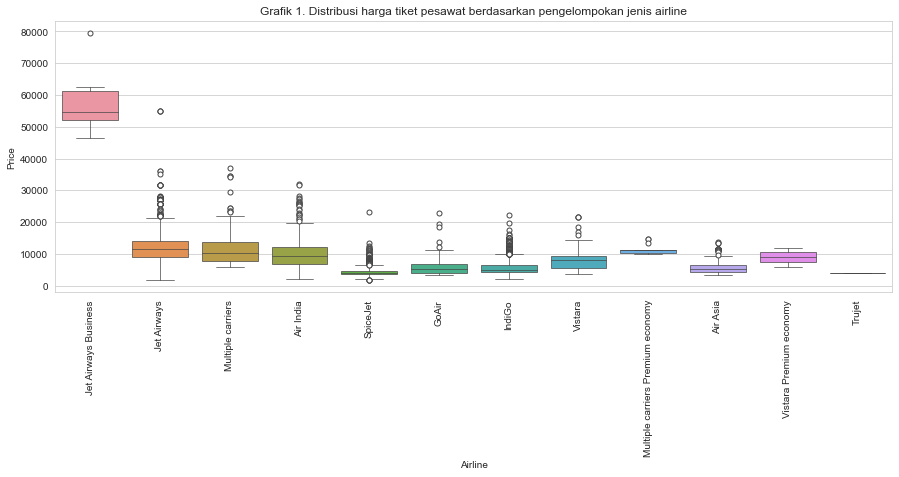

In [33]:
# memplot box plot airline vs price
bplot(x = 'Airline', y ='Price', data = train_data.sort_values('Price',ascending = False))
plt.title('Grafik 1. Distribusi harga tiket pesawat berdasarkan pengelompokan jenis airline')
plt.xticks(rotation=90)
plt.show()

**Grafik 1** diatas merupakan grafik box plot menunjukan distribusi harga dari 12 airline diurutkan dari harga airline yang paling tinggi. Jet Airways Business memiliki harga tiket pesawat yang paling mahal, tetapi memiliki outlier (nilai diluar box plot) yang sedikit, hal ini menunjukan harga cukup stabil atau tidak fluktuatif dibandingkan dengan layanan penerbangan lainnya. Airline selain Jet Airways Business hampir memiliki median harga yang sama.

Data 'Airline' tidak memiliki urutan sehingga data diubah menggunakan OneHot Encoding

In [34]:
# membuat OneHotEncoding data 'Airline'
Airline = pd.get_dummies(col_cat['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


+ ### Source
Dari kategori feature Source dapat diketahui bagaimana persebaran harga penerbangan berdasarkan lokasi kebarangkatan dengan menggunakan box plot

In [35]:
# menghitung jumlah penerbangan setiap lokasi keberangkatan
col_cat['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

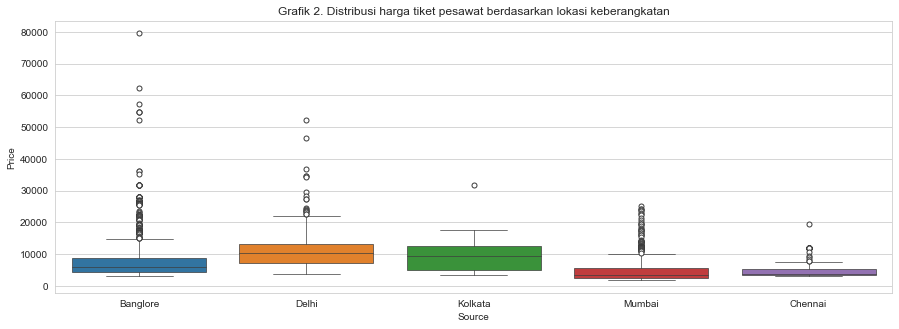

In [36]:
# memplot source vs price
bplot(x = 'Source', y ='Price', data = train_data.sort_values('Price',ascending = False))
plt.title('Grafik 2. Distribusi harga tiket pesawat berdasarkan lokasi keberangkatan')
plt.show()

**Grafik 2** diatas merupakan grafik box plot menunjukan distribusi harga berdasarkan 5 lokasi keberangkatan diurutkan dari harga yang paling tinggi. Penerbangan dari Banglore memiliki harga fluktuatif paling tinggi. Sedangkan untuk nilai median tertinggi terletak pada penerbangan dari Delhi

Data 'Source' tidak memiliki urutan sehingga untuk mempermudah data diubah menggunakan OneHot Encoding

In [37]:
# membuat OneHotEncoding 'Source'
Source = pd.get_dummies(col_cat['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


+ ### Destination
kategori feature Destination dapat diketahui bagaimana persebaran harga penerbangan berdasarkan lokasi kedatangan dengan menggunakan box plot

In [38]:
# menghitung jumlah penerbangan setiap lokasi kedatangan
col_cat['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

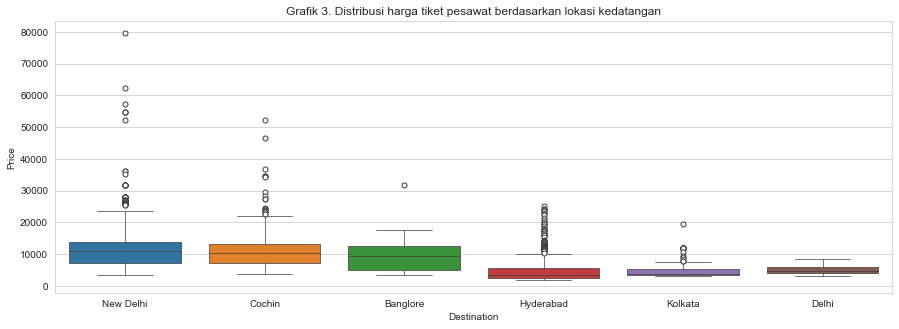

In [39]:
# memplot destination vs price
bplot(x = 'Destination', y ='Price', data = train_data.sort_values('Price',ascending = False))
plt.title('Grafik 3. Distribusi harga tiket pesawat berdasarkan lokasi kedatangan')
plt.show()

**Grafik 3** diatas merupakan grafik box plot menunjukan distribusi harga berdasarkan 6 lokasi kedatangan diurutkan dari harga yang paling tinggi. Penerbangan menuju New Delhi memiliki fluktuatif dan median harga paling tinggi.

Data 'Destination' tidak memiliki urutan sehingga untuk mempermudah data diubah menggunakan OneHot Encoding

In [40]:
# membuat OneHotEncoding 'Destination'
Destination = pd.get_dummies(col_cat['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


+ ### Total_Stops
kategori feature Total_Stops dapat diketahui bagaimana persebaran harga penerbangan berdasarkan jumlah pemberhentian dengan menggunakan box plot

In [41]:
# menghitung jumlah penerbangan setiap jumlah pemberhentian
col_cat['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

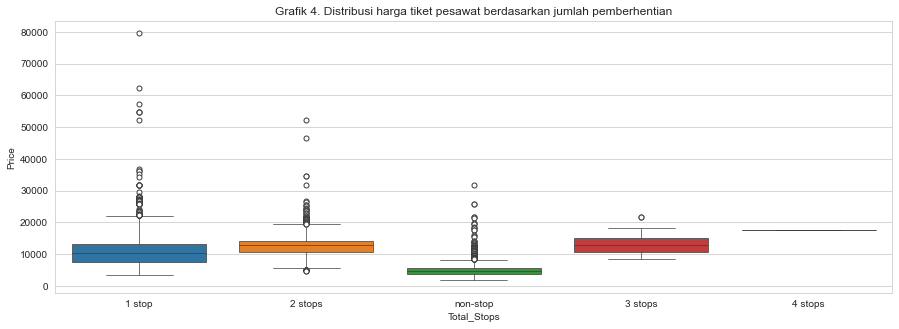

In [42]:
# memplot Total_Stops vs price
bplot(x = 'Total_Stops', y ='Price', data = train_data.sort_values('Price',ascending = False))
plt.title('Grafik 4. Distribusi harga tiket pesawat berdasarkan jumlah pemberhentian')
plt.show()

**Grafik 4** diatas merupakan grafik box plot menunjukan distribusi harga berdasarkan jumlah pemberhentian diurutkan dari harga yang paling tinggi. Penerbangan dengan 1 pemberhentian lebih memungkinkan memiliki harga yang fluktuatif dibandingkan jumlah pemberhentian lainnya. Sedangkan untuk tanpa harga median trmurah dimiliki oleh penerbangan tanpa berhenti

Data 'Total_Stop' memiliki urutan pemberhentian sehingga data diubah menggunakan Label Encoding

In [43]:
# membuat label nomor setiap kategori di 'Total_Stops'
dict={'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}
print(dict)

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}


maka untuk katogori 'non-stop' akan digantikan dengan angka 0 dan seterusnya

In [44]:
# membuat kolom label dari kategori 'Total_Stops'
Total_Stops = col_cat['Total_Stops'].map(dict)

In [45]:
Total_Stops.head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

+ ### Route
feature Route memiliki data yang cukup unik, data route menunjukan lokasi rute perjalanan penerbangan. Untuk memudahkan analisis, lokasi rute perjalanan dapat diurai dan dibuat kolom baru setiap rute. Setelah itu setiap kolom baru loksai rute  diubah menjadi numerik.

In [46]:
# menampilkan kolom 'Route'
col_cat["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
# memsihakan lokasi route menjadi array dengan pemisahan setiap ' → '
Route = pd.DataFrame(col_cat["Route"].str.split(' → '))
Route.head()

,Route
0,"[BLR, DEL]"
1,"[CCU, IXR, BBI, BLR]"
2,"[DEL, LKO, BOM, COK]"
3,"[CCU, NAG, BLR]"
4,"[BLR, NAG, DEL]"


Berdasarkan kolom 'Total_Stops' jumlah pemberhentian maksimal sejumlah 4 pemberhentian, Sehingga panjang maksimal array adalah 6 rute. Dengan demikian, rute dapat dipisah menjadi menjadi 6 kolom rute

In [48]:
# mengurai array rute menjadi 6 kolom rute
Route["Route_1"] = Route["Route"].str[0]
Route['Route_2'] = Route["Route"].str[1]
Route['Route_3'] = Route["Route"].str[2]
Route['Route_4'] = Route["Route"].str[3]
Route['Route_5'] = Route["Route"].str[4]
Route['Route_6'] = Route["Route"].str[5]
Route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,"[BLR, DEL]",BLR,DEL,NaN,NaN,NaN,NaN
1,"[CCU, IXR, BBI, BLR]",CCU,IXR,BBI,BLR,NaN,NaN
2,"[DEL, LKO, BOM, COK]",DEL,LKO,BOM,COK,NaN,NaN
3,"[CCU, NAG, BLR]",CCU,NAG,BLR,NaN,NaN,NaN
4,"[BLR, NAG, DEL]",BLR,NAG,DEL,NaN,NaN,NaN


Karena data 'Route' sudah terurai, kolom tersebut dapat dihapus.

In [49]:
# menghapus kolom 'Route'
Route.drop('Route', axis = 1, inplace = True)

In [50]:
# menampilkan jumlah data setiap rute
Route.count()

Route_1    10682
Route_2    10682
Route_3     7191
Route_4     1566
Route_5       46
Route_6        1
dtype: int64

Kolom rute 3, 4, 5, dan 6 memiliki nilai NaN karena tidak semua perjalanan memiliki jumlah rute yang sama. Sedangkan untuk rute 1 dan 2 merupakan perjalanan terpendek sehingga sudah pasti tidak memiliki nilai NaN. Nilai NaN dapat kita isi dengan string 'None'

In [51]:
# mengisi nilai NaN dengan 'None'
for i in ['Route_3', 'Route_4','Route_5','Route_6']:
    Route[i].fillna('None',inplace=True)

In [52]:
# cek missing value
Route.isnull().sum()

Route_1    0
Route_2    0
Route_3    0
Route_4    0
Route_5    0
Route_6    0
dtype: int64

In [53]:
# cek data Route
Route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None


In [54]:
Route['Route_1'].value_counts()

DEL    4536
CCU    2871
BLR    2197
BOM     697
MAA     381
Name: Route_1, dtype: int64

Untuk menentukan metode pengubah data kategori menjadi menjadi numerik, perlu dilakukan pengcekan feature di setiap kolom rute

In [55]:
# cek feature dari setiap kolom rute
for feature in Route.columns:
    print('{} memiliki {} kategori'.format(feature,len(Route[feature].value_counts())))

Route_1 memiliki 5 kategori
Route_2 memiliki 40 kategori
Route_3 memiliki 27 kategori
Route_4 memiliki 12 kategori
Route_5 memiliki 6 kategori
Route_6 memiliki 2 kategori


Karena setiap kolom rute memiliki jumlah kategori yang berbeda-beda dan jumlah yang sangat banyak, maka lebih baik untuk menggunakan metode LabelEncoding

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Untuk mengetauhi label konversi setiap kategori, dapat dilakukan mapping label katogori setiap kolom rute sebelum menkonversi feature menjadi numerik.

In [57]:
# mapping label kategori setiap kolom
def get_route_label(arg):
    encoder.fit(arg)
    route_name_mapping = zip(encoder.classes_, encoder.transform(encoder.classes_))
    route_list = list(route_name_mapping)
    return {y:x for x,y in route_list}

label_route_1 = get_route_label(Route['Route_1'])
label_route_2 = get_route_label(Route['Route_2'])
label_route_3 = get_route_label(Route['Route_3'])
label_route_4 = get_route_label(Route['Route_4'])
label_route_5 = get_route_label(Route['Route_5'])
label_route_6 = get_route_label(Route['Route_6'])

In [58]:
# cek salah satu label mapping
label_route_4

{0: 'AMD',
 1: 'BBI',
 2: 'BHO',
 3: 'BLR',
 4: 'BOM',
 5: 'COK',
 6: 'DEL',
 7: 'GWL',
 8: 'HYD',
 9: 'NAG',
 10: 'None',
 11: 'TRV'}

In [59]:
# mengkonversi kateogrik menjadi numerik dengan LabelEncoder
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5','Route_6']:
    Route[i] = encoder.fit_transform(Route[i])
Route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,0,10,21,10,4,1
1,2,20,1,3,4,1
2,3,27,4,5,4,1
3,2,29,3,10,4,1
4,0,29,7,10,4,1


+ ### Additional_Info
Feature Additional_Info hampir 80% memiliki kategori 'No Info' maka kolom ini dapat dihapus atau tidak diikut sertakan

In [60]:
# cek jumlah kategori Additional_Info
col_cat['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [61]:
# menghitung seberapa banyak data 'No info'
no_info = len(col_cat[col_cat['Additional_Info'] == 'No info'])/len(col_cat['Additional_Info'])
print('Persentasi kategori No Info sebanyak %2.2f%%' % (no_info*100))

Persentasi kategori No Info sebanyak 78.11%


Setelah seluruh data kategorik diubah menjadi numerik, dapat digabung kembali dengan data numerik ('Airline', 'Source', 'Destination', 'Total_Stops', 'Route', dan 'Price')

In [62]:
# menggabungkan data dan tampilkan seluruh kolom
data_train = pd.concat([Airline,Source,Destination,Total_Stops,Route,col_num,train_data['Price']],axis=1)
pd.set_option('display.max_columns',36)
data_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Price
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,21,10,4,1,24,3,22,20,1,10,2,50,3897
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,20,1,3,4,1,5,1,5,50,13,15,7,25,7662
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3,27,4,5,4,1,6,9,9,25,4,25,19,0,13882
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,29,3,10,4,1,5,12,18,5,23,30,5,25,6218
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,29,7,10,4,1,3,1,16,50,21,35,4,45,13302


### Handling Outlier
menangani outlier dapat dilakukan secara keseluruhan dari pesebaran harga penerbangan, maka hal ini dapat dibantu dengan grafik bloxplot dan histogram

In [63]:
# mendefinisikan perintah plot histogram dan boxplot
def plot(df,col):
    fig, (ax0, ax1) = plt.subplots(2,1,figsize=(10,5), sharex = True)
    flierprops = {'marker' :'o', 'markerfacecolor':'white'}
    sns.histplot(x = col, data = df, ax = ax0, kde=True)
    sns.boxplot(x = df[col], ax = ax1, flierprops = flierprops)

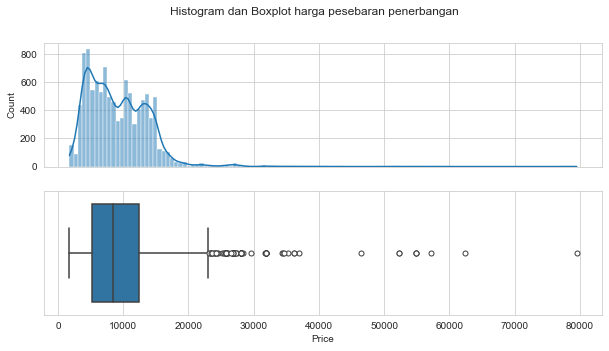

In [64]:
# plot grafik
plot(data_train,'Price')
plt.suptitle('Histogram dan Boxplot harga pesebaran penerbangan')
plt.show()

In [65]:
# menghitung jumlah data harga diatas 40000
train_data['Price'][train_data['Price'] >= 40000].count()

9

Grafik histogram menunjukan bahwa condong ke kanan (positively skewed) yang artinya harga tiket yang sering dikeluarkan lebih rendah daripada nilai tengah harga tiket. Sedangkan dari grafik boxplot terlihat bahwa outlier diatas 40000 sebanyak 9 data. Karena data diatas 40000 hanya sedikit dan bisa mencapai dua kali lipat maka 9 data tersebut akan di transormasikan, pada kasus ini data akan diganti dengan harga median

In [66]:
#data = np.where(kondisi,iya,tidak)
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

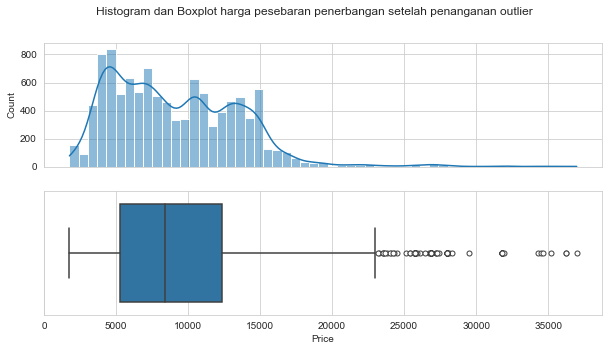

In [67]:
plot(data_train,'Price')
plt.suptitle('Histogram dan Boxplot harga pesebaran penerbangan setelah penanganan outlier')
plt.show()

In [68]:
# cek data statistik Price
data_train['Price'].describe()

count    10682.000000
mean      9046.090994
std       4387.489557
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      36983.000000
Name: Price, dtype: float64

### Dependent dan Independent Variable

Dari analisa, feature harga sangat bergantung pada feature lainnya, maka harga merupakan variabel dependen (terikat) atau variabel target dan feature lainnya merupakan variabel independen (bebas)

In [69]:
# memisahkan variabel dependen dan independen
X = data_train.drop('Price',axis = 1)
y = data_train['Price']

In [70]:
X.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,21,10,4,1,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,20,1,3,4,1,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3,27,4,5,4,1,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,29,3,10,4,1,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,29,7,10,4,1,3,1,16,50,21,35,4,45


In [71]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Feature Selection
Seleksi fitur digunakan untuk mengetahui feature terabik yang paling berkontribusi dan memiliki hubungan dengan variabel target. dari informasi tersebut dapat digunakan Untuk memilih fitur penting dan mengurangi dimensi feature


In [72]:
# import feature selection
from sklearn.feature_selection import mutual_info_classif

In [73]:
# membuat data importance dari setiap variabel bebebas terhadap variabel terikat
# diurutkan dari yang paling penting
imp = pd.DataFrame(mutual_info_classif(X,y),index = X.columns)
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.441463
Route_3,2.185677
Total_Stops,2.160462
Route_1,2.045387
Route_6,1.847804
Arrival_Time_hour,1.830993
Duration_hour,1.788849
Route_5,1.750908
Cochin,1.573093
Delhi,1.559659


hasil menunujukan 3 feature yang paling berkontribusi pada harga tiket yaitu 'Route_2', 'Route_3' dan 'Total_Stops'

# Modeling dan Evaluation

## Modeling
Dalam modeling, tahap ini menerapkan algoritma machine learning pada data. Sebelumnya, data perlu di urai menjadi train dan tes, yang dimana data train digunakan untuk melatih model dan data tes untuk menguji model. 

In [74]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [75]:
# urai data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Pada kasus ini akan diterapkan beberapa algoritma, sehingga dibuat fungsi otomatisasi untuk mempermudah pemrosesan model dan evaluasi

In [76]:
from sklearn import metrics
def predict(ml_model):
    """
    - fungsi menerima algoritma machine learning
    - menghasilkan nilai training dan prediksi
    - menghasilkan nilai R2, MAE, MSE, RMSE
    - memplot distribusi hasil prediksi
    """
    model = ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    prediction = model.predict(X_test)
    print('Prediction: {}'.format(prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test,prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
    print('MSE: ',metrics.mean_squared_error(y_test,prediction))
    print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
    sns.histplot(y_test-prediction, kde = True, stat="density")

## Evaluation

### Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9543479830685422
Prediction: [11899.22        3947.48633333 10809.84       ...  9148.53
 13447.55        5597.02      ]


r2 score: 0.8170272634758347
MAE:  1159.4840775874932
MSE:  3506054.9585719756
RMSE:  34.05119788770276


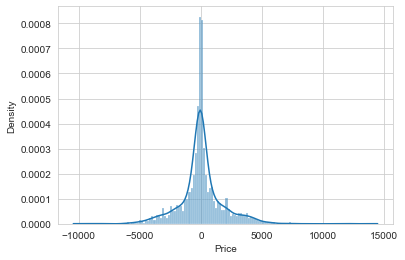

In [78]:
predict(RandomForestRegressor())

Dengan algoritma random forest regression score training didapatkan sebesar 95.69%. test akurasi model ditunjukan oleh R2 maka didapari sebesar sekitar 80.67%. Titik nol dalam grafik menunjukan ketepatan model dalam memprediksi harga. grafik memiliki garis KDE dengan puncak disekitar nol sehingga sebagian besar prediksi sudah tepat.

### Linear Regression

Training Score: 0.6136628983388792
Prediction: [11237.49396339  4030.53720056 11734.18741325 ...  9745.45847138
 10955.67984909  6542.61087686]


r2 score: 0.6212818948844158
MAE:  1910.7808350125306
MSE:  7256854.302805451
RMSE:  43.71247916799653


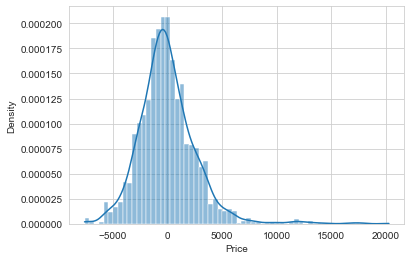

In [79]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

### Decision Tree Regressor

Training Score: 0.967826910385165
Prediction: [12192.  3873. 10161. ...  8610. 14231.  5298.]


r2 score: 0.7319595916423287
MAE:  1327.1434877554204
MSE:  5136089.784042531
RMSE:  36.42998061700583


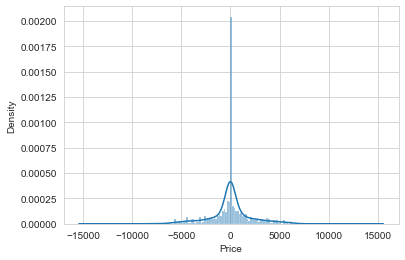

In [80]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

### KNN Regressor

Training Score: 0.7741984489888272
Prediction: [10211.2  3914.   9317.4 ...  9180.6  9996.2  5953.6]


r2 score: 0.6583409055530997
MAE:  1732.9913897987833
MSE:  6546743.4382966785
RMSE:  41.62921317775275


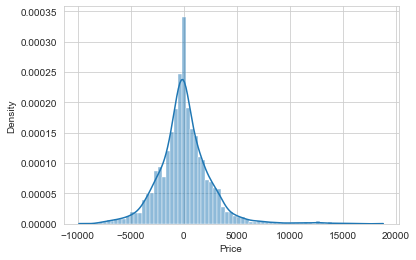

In [81]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor())

### Cross Validation
Dari beragam pengujian model, algoritma Random Forest Regression memiliki nilai akurasi yang paling baik. Tetapi hasil tersebut masih bisa ditingkatkan karena model belum memiliki modifikasi hyperparameter. Setiap alogritma memiliki hyperparameter sendiri, dan bisa dilakukan penyetelan beberapa parameter tersebut. Hasil akurasi dari berbagai penyetelan dapat saling dibandingkan atau cross validation dan diambil parameter terbaik. Dalam kasus in teknik cross validation menggunakan RandomizedSearchCV

In [82]:
# cek paramter RandomForestRegressor (atau bisa dengan Shift+Tab di RandomForestRegressor)
reg = RandomForestRegressor()
for parameter in reg.get_params():
    print(parameter)

bootstrap
ccp_alpha
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_impurity_split
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


In [83]:
# import library cros validation
from sklearn.model_selection import RandomizedSearchCV

In [84]:
# jumlah tree di random forrest
n_estimators=[int(x) for x in np.linspace(100,1000,10)]

# tipe jumlah fitur setiap split
max_features=['auto','sqrt']

# maksimal level setiap tree
max_depth=[int(x) for x in np.linspace(5,30,6)]

# minimal jumlah sampel untuk mengurai simpul/node
min_samples_split=[5,10,15,20,25,100]

In [94]:
# menggabungkan parameter menjadi satu
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [95]:
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [5, 10, 15, 20, 25, 100]}

Pada kasus ini, paramater yang dituning 'n_estimators', 'max_features', 'max_depth', dan 'min_samples_split' dalam array list nilai yang duji, lalu dijadikan satu dalam dict random_grid

In [96]:
# masukan model yang akan di tuning
est_rf=RandomForestRegressor()

In [97]:
# tuning hyperparameter model
cv_rfrandom=RandomizedSearchCV(estimator=est_rf,
                               param_distributions=random_grid,
                               cv=5,
                               verbose=1,
                               n_jobs=-1)

In [98]:
# train model yang sudah dituning
cv_rfrandom.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=1)

In [99]:
# menampilkan nilai parameter terbaik
cv_rfrandom.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

dari hasil cross validation didapatkan nilai parameter terbaik ditunjukan pada dict diatas, dari model akan memilih langsung nilai parameter terbaik. Lalu dapat diuji dengan data test dan bandingkan dengan nilai sebelum tuning

In [100]:
prediction=cv_rfrandom.predict(X_test)

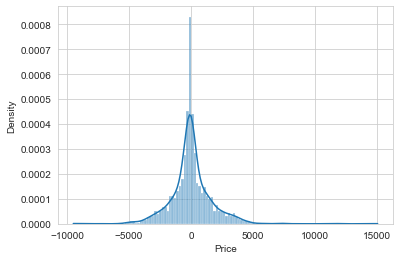

In [105]:
sns.histplot(y_test-prediction, kde = True, stat="density")
plt.show()

In [102]:
metrics.r2_score(y_test,prediction)

0.8445926125136669

Dari model sebelum tuning didapatkan nilai akurasi (R2) sebesar 0.81 dan setelah tuning dan cross validation hasil akurasi sebesar 0.84. hasil akurasi menunjukan lebih besar dibandingkan setelah tuning, hasil dapat bervariatif sesuai dengan model dan pengujian tuning masing-masing. Bisa jadi pada kasus tertentu suatu model lain memiliki nilai akurasi lebih tinggi ketika menggunakan deafult parameter

# Deployment
ketika sudah melakukan tuning dan mendapat hasil yang diharapkan, kita bisa mendeploy atau menyimpan model sehingga dapat digunakan ulang model tersebut.

In [107]:
# imoort library deployment
import pickle

In [117]:
# membuat file .pkl dan simpan model ke file .pkl
with open('phtp_rf.pkl','wb') as file:
    pickle.dump(cv_rfrandom,file)

setelah menyimpan model, kita dapat membuka model tersebut dan menggunakan model kembali untuk memprediksi harga.

In [118]:
# membuka model yang telah disimpan
model=open('phtp_rf.pkl','rb')
forest=pickle.load(model)

In [119]:
# prediksi harga tiket
y_prediction=forest.predict(X_test)

In [120]:
# harga tiket hasil prediksi
y_prediction

array([11960.69509555,  3966.63730032, 11794.61892032, ...,
        8932.50939449, 12660.27296425,  5732.87077561])

In [122]:
# akurasi prediksi
metrics.r2_score(y_test,y_prediction)

0.8445926125136669